In [48]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, multilabel_confusion_matrix
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

In [49]:
data_raw=pd.read_csv("./data/Train.csv")
meta=pd.read_csv("./data/airqo_metadata.csv")

In [50]:
from files.preprocessing import preprocessing

In [51]:
data = preprocessing(data_raw, use_location=False, only_means=False)#, drop=['wind_dir'])

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [52]:
target_th = 150
#data[data['target'] > target_th] = data[data['target'] > target_th].assign(target=target_th)

In [53]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
param_grid = {
    'learning_rate': np.arange(0.1, 10.0, 1.0)
}


gs = GridSearchCV(AdaBoostRegressor(ExtraTreesRegressor(max_depth=50, max_features= 'log2', random_state=42), random_state=42), verbose=2, param_grid=param_grid, cv=5, n_jobs=-1)
#gs.fit(X_train, y_train)
#gs.best_params_

In [55]:
#reg = LinearRegression()
#reg = DecisionTreeRegressor()
#reg = RandomForestRegressor()
reg = ExtraTreesRegressor(n_estimators=400, max_depth=50, max_features= 'log2', random_state=42)
#reg = AdaBoostRegressor(ExtraTreesRegressor(max_depth=50, max_features= 'log2', random_state=42), random_state=42, learning_rate=2.0)
#reg = gs.best_estimator_
#reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred_reg, squared=False))
print(r2_score(y_test, y_pred_reg))
y_pred_reg_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_pred_reg_train, squared=False))

24.555889117676173
0.6892146562822785
6.035853589337779


In [56]:
#y_pred_reg[y_pred_reg > 150] = 150
#y_test[y_test > 150] = 150

In [57]:
print(mean_squared_error(y_test, y_pred_reg, squared=False))

24.555889117676173


In [58]:
Test_data = data.iloc[X_test.index]
Test_data['error'] = np.abs(y_test-y_pred_reg)
Test_data

/var/folders/zb/xbgk1g2j3sj47pws2mbz0r500000gn/T/ipykernel_46415/1936763152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data['error'] = np.abs(y_test-y_pred_reg)


,target,max_temp,min_temp,mean_temp,var_temp,median_temp,ptp_temp,last_temp,mean_last_day_temp,max_precip,...,mean_last_day_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,last_atmos_press,mean_last_day_atmos_press,error
12933,37.692000,30.450000,19.291667,23.930028,9.328229,23.391667,11.158333,24.183333,22.571528,0.510,...,0.656389,87.995000,87.461667,87.735579,0.015901,87.740000,0.533333,87.907500,87.706389,28.986892
9990,64.736383,31.125000,18.775000,23.802893,13.893311,23.283333,12.350000,27.225000,22.393403,8.828,...,0.803993,90.979167,90.258333,90.619139,0.031018,90.635000,0.720833,90.683333,90.717812,7.086283
7530,46.250217,27.208333,16.241667,20.473885,8.763716,19.983333,10.966667,18.850000,21.723611,9.076,...,0.723542,88.038333,87.573333,87.798275,0.012435,87.794167,0.465000,87.902500,87.810729,28.598519
1323,46.020870,26.991667,17.275000,21.146419,5.208114,20.441667,9.716667,23.708333,20.487500,15.831,...,0.896424,88.181667,87.572500,87.913506,0.013732,87.903333,0.609167,87.900833,87.954514,13.947473
3043,77.952766,30.900000,15.891667,23.357231,20.702693,23.066667,15.008333,25.158333,22.742330,0.187,...,0.856897,90.793333,90.106667,90.487669,0.025309,90.512500,0.686667,90.404167,90.511569,5.842305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14703,54.493256,26.991667,17.733333,21.017287,7.111031,19.800000,9.258333,24.683333,20.953472,10.369,...,0.769792,88.636667,87.935000,88.336398,0.025865,88.355833,0.701667,88.505833,88.339375,5.387424
6248,131.595854,26.641667,17.425000,23.259422,5.860516,23.137500,9.216667,21.225000,23.259422,0.204,...,1.015919,88.595000,88.290000,88.462311,0.010506,88.478750,0.305000,88.595000,88.462311,21.406322
13118,19.547083,29.866667,18.350000,23.411088,8.837135,22.833333,11.516667,25.400000,22.110417,3.524,...,1.379896,90.960000,90.252500,90.629463,0.023889,90.633333,0.707500,90.545833,90.716181,45.703506
8971,29.043182,28.600000,17.433333,21.919215,8.064435,20.866667,11.166667,19.950000,20.665625,8.140,...,1.018627,88.583333,87.775000,88.205785,0.029227,88.215000,0.808333,88.035833,88.239444,25.166863


[Text(0.5, 1.0, 'mean atmosphere pressure'), Text(0, 0.5, 'atm')]

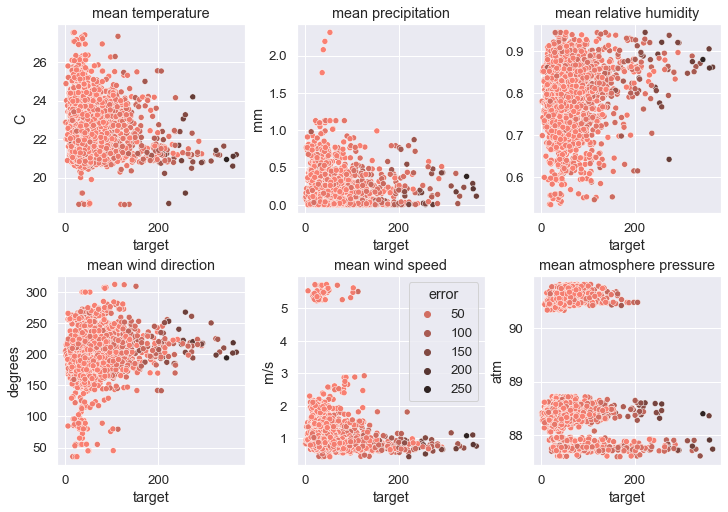

In [59]:
sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2, 3, figsize=(10, 7), constrained_layout=True)
#sns.set(rc = {'figure.figsize':(2,7)})
ax = sns.scatterplot(ax=axes[0,0], y='mean_temp', data=Test_data, x='target', hue='error', palette='dark:salmon_r', legend =False)
#plt.colorbar(ax)
ax.set(title='mean temperature', ylabel='C')
ax = sns.scatterplot(ax=axes[0,1], y='mean_precip', data=Test_data, x='target', hue='error', palette='dark:salmon_r', legend =False)
ax.set(title='mean precipitation', ylabel='mm')
ax = sns.scatterplot(ax=axes[0,2], y='mean_rel_humidity', data=Test_data, x='target', hue='error', palette='dark:salmon_r', legend =False)
ax.set(title='mean relative humidity', ylabel='')
ax = sns.scatterplot(ax=axes[1,0], y='mean_wind_dir', data=Test_data, x='target', hue='error', palette='dark:salmon_r', legend =False)
ax.set(title='mean wind direction', ylabel='degrees')
ax = sns.scatterplot(ax=axes[1,1], y='mean_wind_spd', data=Test_data, x='target', hue='error', palette='dark:salmon_r')
ax.set(title='mean wind speed', ylabel='m/s')
ax = sns.scatterplot(ax=axes[1,2], y='mean_atmos_press', data=Test_data, x='target', hue='error', palette='dark:salmon_r', legend =False)
ax.set(title='mean atmosphere pressure', ylabel='atm')

<AxesSubplot:xlabel='target', ylabel='error'>

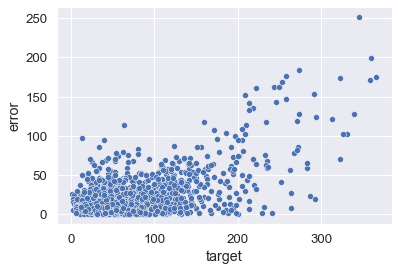

In [60]:
sns.scatterplot(data=Test_data, x='target', y='error')

Text(0.5, 0, 'datapoint')

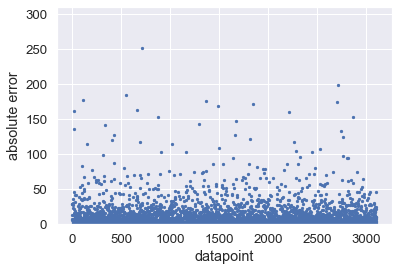

In [61]:
plt.scatter(range(len(y_test)),np.abs(y_test-y_pred_reg), s=5.0)
plt.ylim([0,310])
plt.ylabel('absolute error')
plt.xlabel('datapoint')

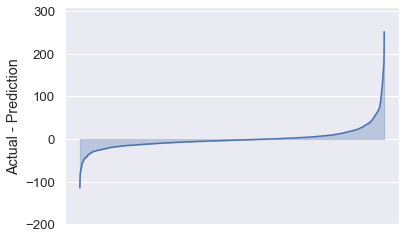

In [62]:
errors = sorted(y_test-y_pred_reg)
#plt.scatter(x=range(len(y_test)),y= errors, s=5.0)
plt.plot(errors)
plt.xticks([])
plt.ylim([-200,310])
plt.ylabel('Actual - Prediction')
#plt.xlabel('datapoint')
plt.fill_between(x= range(len(errors)), y1= errors, color= "b", alpha= 0.3)

Text(0.5, 0, 'Actual')

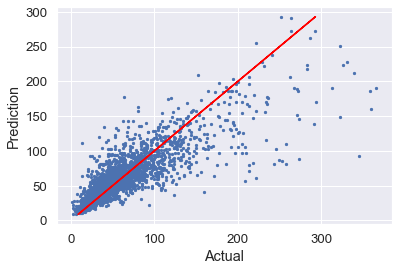

In [63]:
plt.scatter(x=y_test,y= y_pred_reg, s=5.0)
plt.plot(y_pred_reg, y_pred_reg, color='red')
plt.ylabel('Prediction')
plt.xlabel('Actual')
#plt.xlim([0,100])
#plt.ylim([0,100])


In [64]:
sorted(np.array([X_train.columns, reg.feature_importances_]).T, key= lambda t: t[1])

[array(['min_precip', 0.0], dtype=object),
 array(['median_precip', 0.0], dtype=object),
 array(['last_precip', 0.008356736463400133], dtype=object),
 array(['min_wind_dir', 0.011365400559894767], dtype=object),
 array(['max_wind_dir', 0.011846711452602028], dtype=object),
 array(['max_temp', 0.012011500279155329], dtype=object),
 array(['min_rel_humidity', 0.012048556483581075], dtype=object),
 array(['ptp_precip', 0.012257574821332643], dtype=object),
 array(['max_precip', 0.012364289180464314], dtype=object),
 array(['ptp_temp', 0.012431579048914294], dtype=object),
 array(['ptp_wind_dir', 0.01270228640655014], dtype=object),
 array(['ptp_rel_humidity', 0.012761701136975476], dtype=object),
 array(['min_wind_spd', 0.013508629953470798], dtype=object),
 array(['ptp_atmos_press', 0.013897865414892914], dtype=object),
 array(['max_rel_humidity', 0.014949799626754544], dtype=object),
 array(['mean_last_day_precip', 0.015007290873426008], dtype=object),
 array(['min_temp', 0.016758026674

In [65]:
y_test_MC = pd.cut(y_test, bins=[0,12,35,55,150,250, float('inf')])
y_pred_reg_MC = pd.cut(y_pred_reg, bins=[0,12,35,55,150,250, float('inf')])

In [66]:
confusion_matrix(y_test_MC.values.rename_categories([0,1,2,3,4,5]).to_list(), y_pred_reg_MC.rename_categories([0,1,2,3,4,5]).to_list())

array([[  8,  39,   3,   0,   0,   0],
       [  1, 498, 274,  38,   0,   0],
       [  0,  72, 692, 338,   0,   0],
       [  0,   9, 132, 857,  14,   0],
       [  0,   0,   1,  61,  41,   1],
       [  0,   0,   0,   8,  15,   6]])

In [67]:
errs = []
for target_th in np.arange(400,0,-50):
    data[data['target'] > target_th] = data[data['target'] > target_th].assign(target=target_th)
    X = data.drop('target', axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    reg = ExtraTreesRegressor(n_estimators=400, max_depth=50, max_features= 'log2', random_state=42)
    reg.fit(X_train, y_train)
    y_pred_reg = reg.predict(X_test)
    errs.append(mean_squared_error(y_test, y_pred_reg, squared=False))

KeyboardInterrupt: 

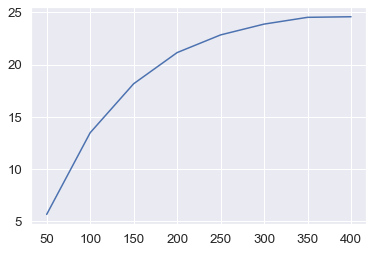

In [ ]:
plt.plot(np.arange(400,0,-50), errs)